In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel("merc.xlsx")

In [3]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
dataFrame.isnull().sum() # null veri var mı diye kontrol ediyor, hangi column'da kaç tane row'da eksik var(sum()) 

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

- bu veri setinde null(yani eksik veri) veri yokmuş

C:\Users\Monster\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 700x500 with 0 Axes>

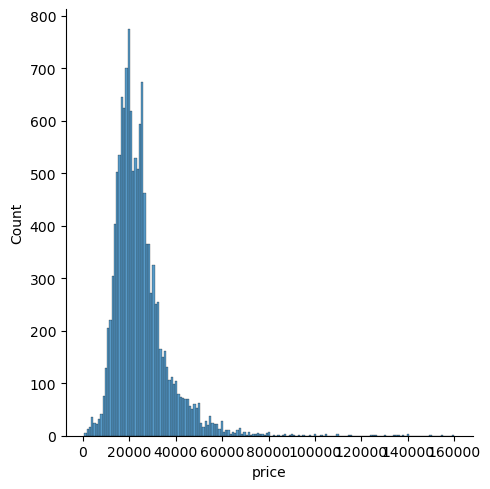

In [6]:
plt.figure(figsize=(7,5)) #seaborn matplolib üzerinden yazıldığı için birlikte kullanılabilir
sbn.displot(dataFrame["price"]) #price column'ı için dağılım grafiği 

- fiyat dağılım grafiğinde anormallik(düzensizlik) var, yüksek fiyatlı araçların sayısı az olduğu için grafik oralara kadar devam eder ancak ortalamadan uzaktır. Bu durum modelin tahminlerinin olması gerekenden yüksek gelmesine sebep olabilir bu nedenle çok yüksek fiyata sahip olanları veri setinden çıkarabiliriz.

<Axes: xlabel='year', ylabel='count'>

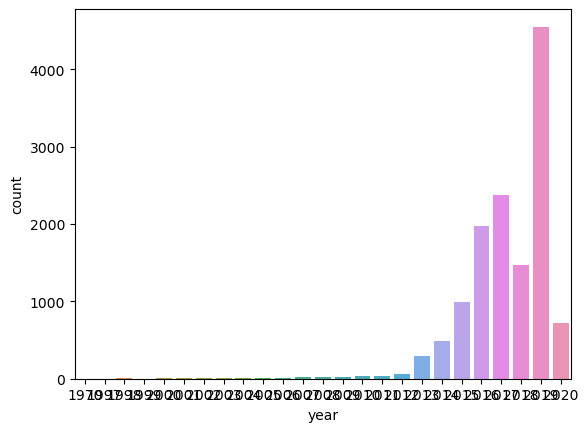

In [7]:
# verilerimizin güncel olup olmadığını yıl grafiği çizdirerek anlayabiliriz 

sbn.countplot(x=dataFrame["year"], data=dataFrame)

In [8]:
# veriler arasındaki korelasyon değerlerini verir 

# Sadece sayısal sütunları seçer
numeric_df = dataFrame.select_dtypes(include=['number'])

numeric_df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [9]:
# Sadece sayısal sütunları seçer
numeric_df = dataFrame.select_dtypes(include=['number'])

numeric_df.corr()["price"].sort_values() # fiyat değerlerinin tüm sütunlardaki değerlerle ilişkisini gösterir

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

- fiyat değerini en çok etkileyen özellik yılmış, arabanın hangi yılda üretildiği fiyatını yüksek oranda etkiliyor.
- aracın sahip olduğu motorun büyüklüğü(engineSize)de önemli ölçüde etkiliyormuş.
- aracın kilometresi(mileage) ise fiyatı negatif yönde etkiliyormuş.

<Axes: xlabel='mileage', ylabel='price'>

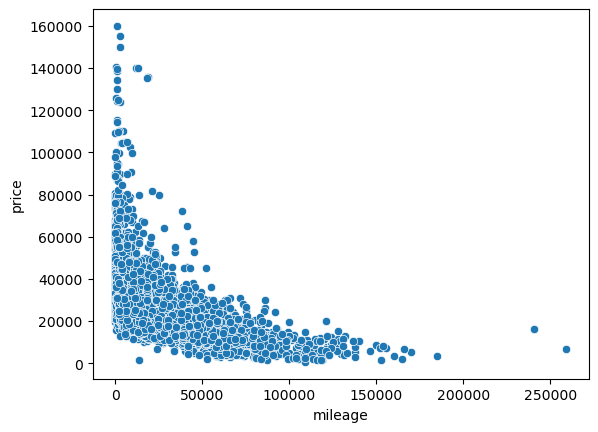

In [10]:
# y ulaşmak, elde etmek istediğimiz veriyi ifade eder 
# x ise özelliklerden birine karşılık geliyor

sbn.scatterplot(x="mileage" , y="price", data=dataFrame)

In [11]:
dataFrame.sort_values("price", ascending= False).head(20) #en yüksek fiyattan en düşüğe doğru sıralar

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [12]:
dataFrame.sort_values("price", ascending= True).head(20) #en düşük fiyattan en yükseğe doğru sıralar

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


- çok yüksek fiyata sahip araçları listeden çıkarmak daha iyi tahminler yapabilemeye olanak sağlayabilir.
- veri setinde 13119 raw var. Bunların 1%'ini veri setinden atıp bu şekilde kullanabiliriz. Bu veri setinde büyük bir değişikliğe veya bozulmaya sebep olmaz. 

In [13]:
len(dataFrame)

13119

In [14]:
len(dataFrame) * 0.01

131.19

- Veri setinden 131 tane veriyi atabiliriz.

In [15]:
# verileri azalan fiyata göre sıralar, iloc(index locate) ile 131.indeksten sonrasını alır.   
newdF = dataFrame.sort_values("price", ascending=False).iloc[131:]

In [16]:
newdF

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [17]:
newdF.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\Monster\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 700x500 with 0 Axes>

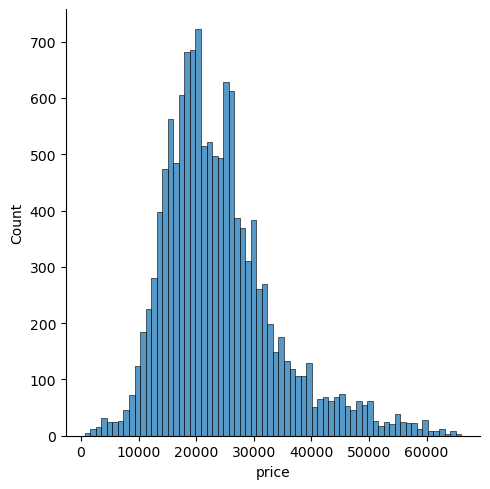

In [18]:
plt.figure(figsize=(7,5))

sbn.displot(newdF["price"])

- veri temizliği sonucu daha düzgün dağılım gösteren bir grafik elde ettik. 

In [19]:
newdF.groupby("year")["price"].mean()

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

- yıllara göre fiyat ortalamasını aldığımızda 1970 yılında yakın tarihlere göre daha yüksek bir fiyat ortalaması geldi bu saçma ve garip bir durum. Paranın zaman değerini göz önünde buludurunca ve şimdiki zamanlarda üretilen araba özelliklerini de düşününce o yıllardaki araba fiyat ortalamasının şimdiki yıllarla aynı veya yakın çıkması normal bir durum değil.
- Bu anormalliği de ortadan kaldırabiliriz.

In [20]:
# 1970 yılını dataframe'den atmış olduk
newdF[newdF.year != 1970].groupby("year")["price"].mean()

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [21]:
# bu işlemi kullancağımız dataframe'e atıyoruz ve özellik kaydedilmiş oluyor
newdF = newdF[newdF.year != 1970]

In [22]:
newdF.groupby("year")["price"].mean()

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [23]:
newdF.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [24]:
newdF.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


- dataframe'i regresyona sokarken sadece numeric veriler içeriyor olması lazım. Bu sebeple transmission column'ını atıyoruz.

In [25]:
newdF = newdF.drop("transmission", axis=1)

In [26]:
newdF.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


- Veri seti şu anda regresyona girmeye hazır hale geldi.

In [27]:
y = newdF["price"].values # y modelin tahmin edeceği değer(ya da özellik)
x = newdF.drop("price",axis=1).values # x ise tahmin sonucunu etkileyecek özellikler(features)

In [28]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [29]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 10)

In [32]:
len(x_train)

9090

In [34]:
len(x_test)

3897

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
x_train = scaler.fit_transform(x_train)

In [39]:
x_test = scaler.transform(x_test)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
x_train.shape

(9090, 5)

- train veri setinin 5 boyutlu olması 5 tane özellik(feature) olmasından kaynaklanıyor.
- normal veri setinde 7 sütun vardı ama price'ı y olarak yani tahmin edilecek özellik olarak aldık, transmission'ı da string sütunu old. için çıkardık geriye 5 feature kaldı.
- dolayısıyla modele katman eklerken en az 5 katman olması gerektiğini göz önünde bulundurmalıyız.

In [43]:
model = Sequential()

model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [44]:
model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=250, epochs=300)

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 676247680.0000 - val_loss: 688070784.0000
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 668567744.0000 - val_loss: 687939904.0000
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 677119936.0000 - val_loss: 687453824.0000
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 672596864.0000 - val_loss: 685819136.0000
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 669671168.0000 - val_loss: 681349888.0000
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 667063104.0000 - val_loss: 670988992.0000
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 661253824.0000 - val_loss: 649755584.0000
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 629653696.0000 - val_loss: 611377536.0000
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 583939968.0000 - val_loss: 549568704.0000
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 517691680.0000 - val_loss: 4614

In [45]:
lossdata = pd.DataFrame(model.history.history)

In [46]:
lossdata.head()

,loss,val_loss
0,672129472.0,688070784.0
1,672057280.0,687939904.0
2,671800384.0,687453824.0
3,670874944.0,685819136.0
4,668117184.0,681349888.0


<Axes: >

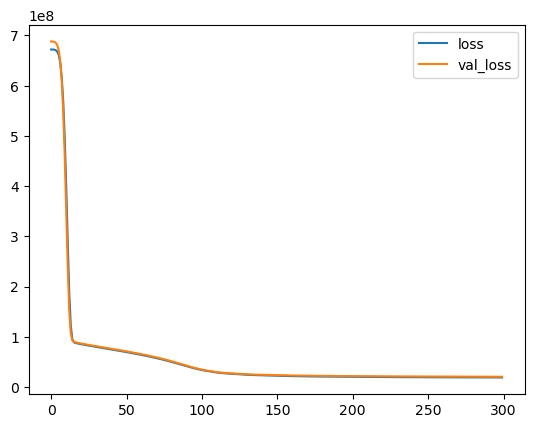

In [47]:
lossdata.plot()

- iki loss değerinin birbiriyle uyum içinde değişim göstermesi modelin başarılı bir performans sergilediğinin işaretlerinden biridir.

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [49]:
tahminDizisi = model.predict(x_test)

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [50]:
tahminDizisi

array([[21838.643],
       [23534.121],
       [25528.986],
       ...,
       [26593.94 ],
       [12936.42 ],
       [25096.842]], dtype=float32)

In [51]:
mean_absolute_error(y_test, tahminDizisi)

3186.8926399589227

- 3186 pound'luk sapma oluyormuş modelin tahminlerinde.
- bunun iyi bir sonuç olup olmadığı yani bu kadar sapmanın göz ardı edilip edilemeyeceğine veriyi kullanan kişi karar verir.

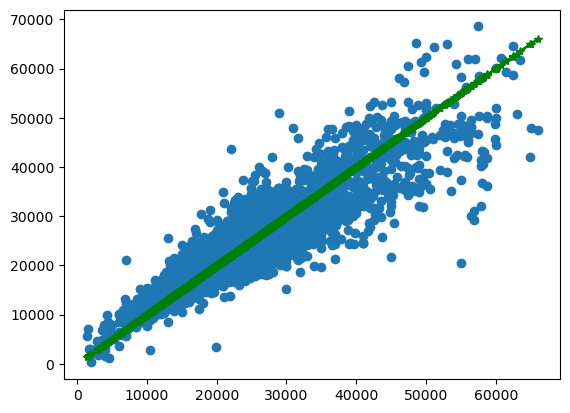

In [52]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test,y_test,"g-*")